In [2]:
from google.colab import files
files.upload()

Saving test_values.csv to test_values.csv
Saving train_labels.csv to train_labels.csv
Saving train_values.csv to train_values.csv


{'test_values.csv': b'patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina\r\nolalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0\r\nz9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0\r\n5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1\r\nmrg7q5,1,normal,102,3,1,0,0,318,0,0,60,160,0\r\nuki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1\r\nkev1sk,2,normal,122,3,0,0,0,213,0.2,0,43,165,0\r\n9n6let,3,normal,150,1,0,0,0,226,2.6,0,66,114,0\r\njxmtyg,2,reversible_defect,140,3,3,0,2,254,2,1,69,146,0\r\n51s2ff,1,normal,138,4,0,0,2,271,0,1,59,182,0\r\nwi9mcs,1,normal,138,3,0,0,2,257,0,1,47,156,0\r\n741h4l,3,normal,130,3,0,0,0,250,3.5,1,37,187,0\r\n1ef64a,2,reversible_defect,140,3,1,0,0,233,0.6,1,50,163,0\r\nwa2ix6,1,normal,140,4,0,0,2,261,0,1,51,186,1\r\n8167zl,2,reversibl

In [3]:
#For Exploratary Data Analysis
import pandas as pd
import numpy as np

#Sklearn
from sklearn.metrics import log_loss,accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#For Visualizing 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#Training Algorithmns
!pip install catboost
from catboost import CatBoostClassifier,cv,Pool
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression

#Other purposes
from tqdm import tqdm_notebook


     |████████████████████████████████| 62.7MB 43.8MB/s 


In [0]:
train_val = pd.read_csv('train_values.csv')
train_lab = pd.read_csv('train_labels.csv')
test_val = pd.read_csv('test_values.csv')
sub = pd.read_csv('submission_format.csv')

In [8]:
train_val.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
dtype: int64

In [36]:
train.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [18]:
train_val.shape

(180, 14)

In [17]:
train_val['slope_of_peak_exercise_st_segment'].values

array(['1', '2', '-', '1', '3', '1', '2', '2', '3', '2', '2', '1', '1',
       '2', '2', '2', '2', '1', '1', '1', '1', '1', '1', '1', '1', '2',
       '1', '1', '2', '1', '2', '2', '3', '1', '2', '1', '1', '1', '1',
       '1', '2', '1', '1', '1', '1', '1', '2', '2', '2', '1', '2', '1',
       '1', '2', '1', '1', '2', '2', '1', '1', '2', '2', '3', '2', '1',
       '1', '2', '2', '2', '2', '1', '1', '1', '1', '2', '2', '2', '2',
       '2', '2', '3', '2', '3', '2', '1', '1', '1', '1', '1', '1', '2',
       '2', '1', '2', '2', '1', '2', '2', '1', '1', '1', '2', '2', '1',
       '1', '2', '1', '2', '1', '2', '2', '1', '2', '2', '1', '1', '2',
       '1', '2', '2', '2', '1', '2', '1', '2', '1', '2', '2', '3', '3',
       '1', '2', '1', '1', '1', '1', '1', '2', '1', '1', '3', '2', '1',
       '2', '2', '1', '1', '2', '1', '2', '1', '3', '2', '1', '2', '1',
       '1', '1', '1', '2', '1', '1', '3', '2', '1', '1', '1', '1', '3',
       '2', '1', '1', '2', '1', '1', '2', '2', '2', '1', '1'],
 

In [0]:
train = train_val.merge(train_lab,on='patient_id',how='outer',left_index=True,right_index=True)

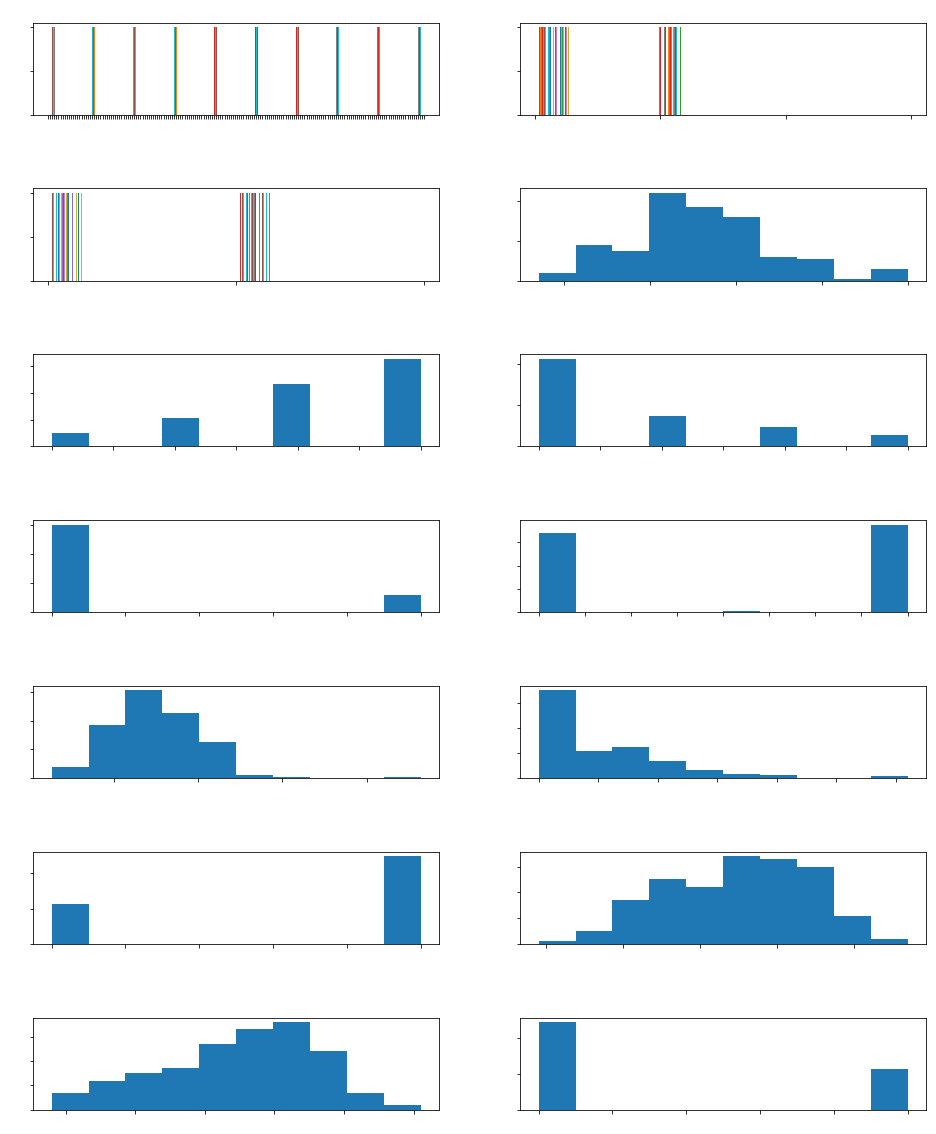

In [35]:
plt.figure(figsize=(16,20))
plt.subplots_adjust(hspace = 0.8)

for i,col in enumerate(train.columns):
  plt.subplot(7,2,i+1)
  plt.xticks(color='white')
  plt.yticks(color='white')
  plt.title(col,color='white')
  plt.hist(train_val[col])

In [38]:
a = train[['thal','heart_disease_present']]
a.head()

,thal,heart_disease_present
0,normal,0
1,normal,0
2,normal,1
3,reversible_defect,1
4,reversible_defect,0


ValueError: ignored

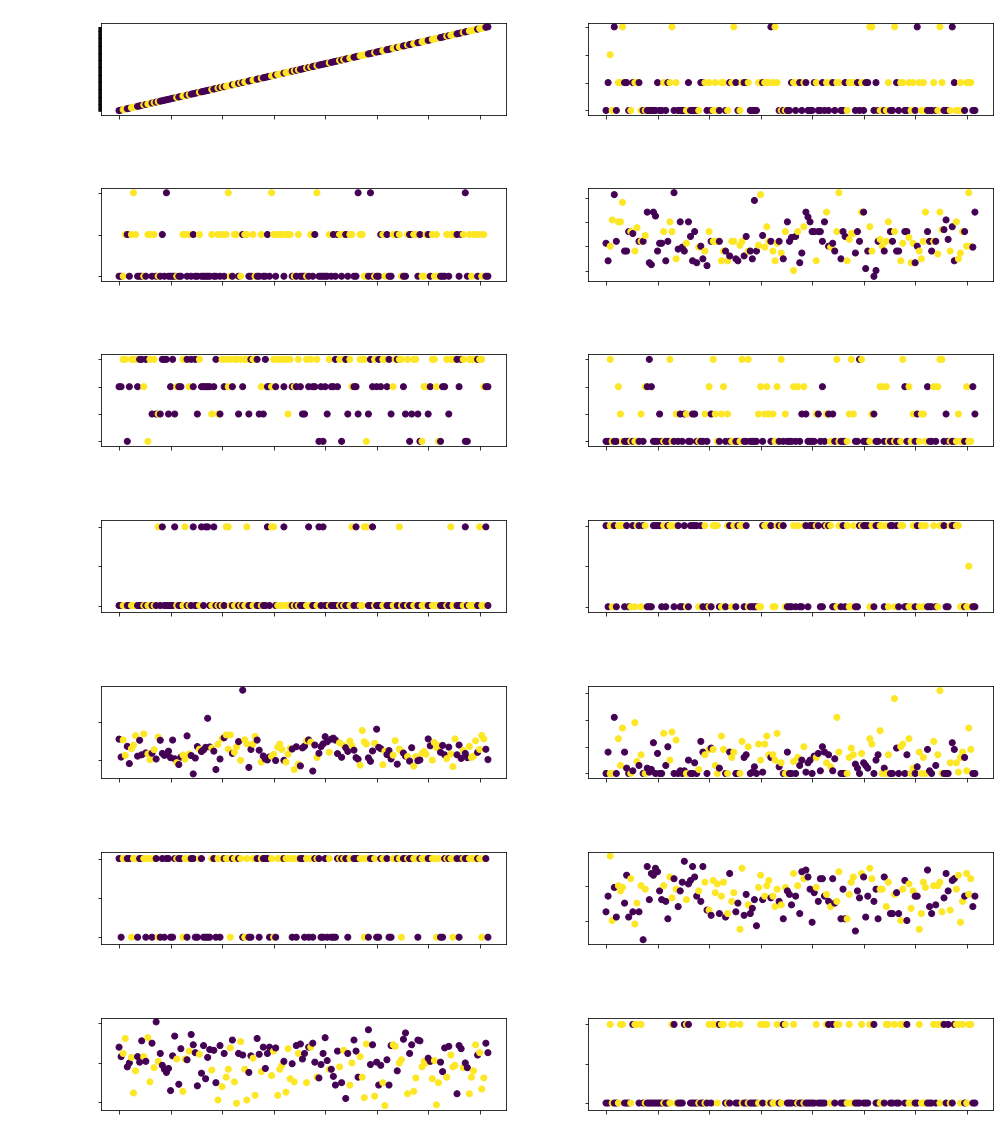

In [37]:
plt.figure(figsize=(16,20))
plt.subplots_adjust(hspace = 0.8)
for i,col in enumerate(train.columns):
  plt.subplot(7,2,i+1)
  plt.xticks(color='white')
  plt.yticks(color='white')
  plt.title(col,color='white')
  plt.scatter(x = train[col].index,y = train[col].values,c = train['heart_disease_present'])

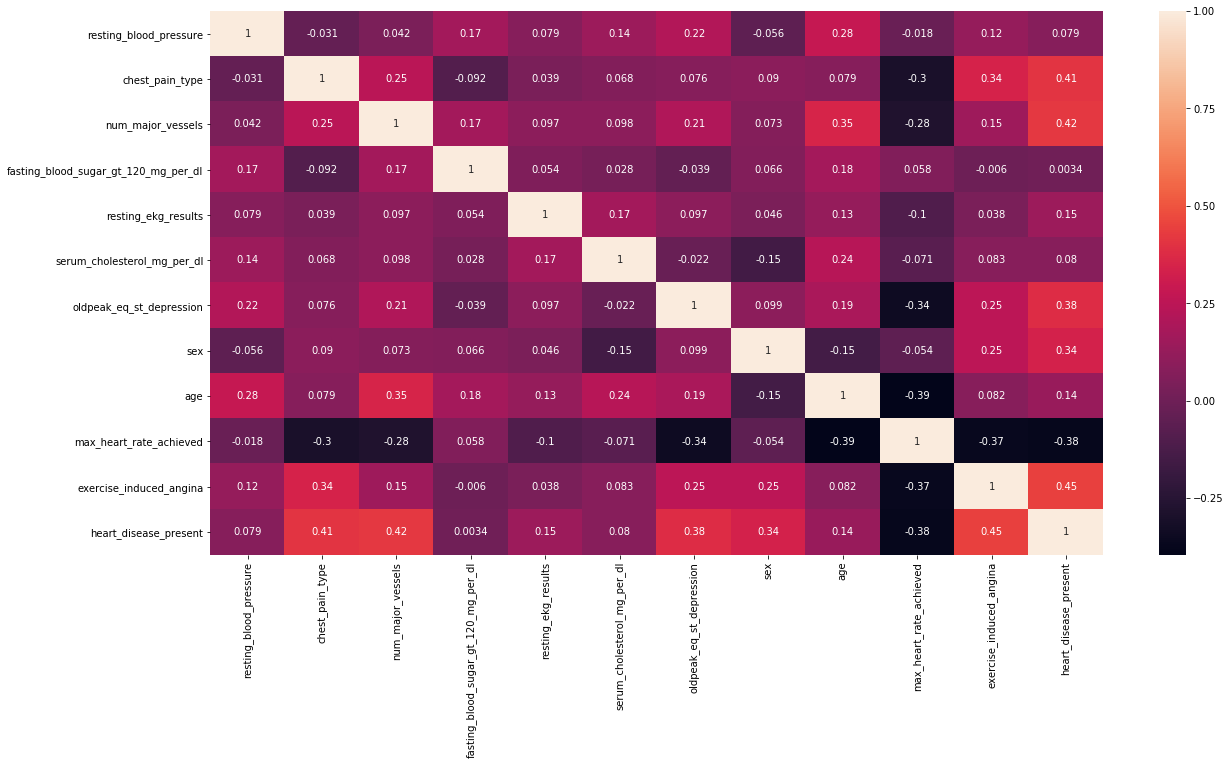

In [0]:
corr = train.corr()
#corr = corr[corr>=0.3]
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

In [0]:
train['chest_pain_vessel'] = np.zeros(train.shape[0])
train['chest_pain_vessel'] = train['chest_pain_type'].astype(str) + '_' + train['']

0    3
1    3
2    4
3    4
4    1
Name: chest_pain_type, dtype: int64

In [0]:
train.pop('patient_id')
test_val.pop('patient_id')

In [0]:
train.isnull().sum()

In [0]:
le = LabelEncoder()
for cols in tqdm_notebook(train.columns):
  if train[cols].dtype == 'object':
    train[cols] = le.fit_transform(train[cols])
    

In [0]:
for cols in tqdm_notebook(test_val.columns):
  if test_val[cols].dtype == 'object':
    test_val[cols] = le.fit_transform(test_val[cols])

In [0]:
catParams = {
    'learning_rate':0.1,
    'iterations':10000,
    'custom_metric':'Logloss',
    'loss_function':'CrossEntropy'
}

In [0]:
train.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,3,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,-,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [0]:
use = ['exercise_induced_angina','chest_pain_type','num_major_vessels','oldpeak_eq_st_depression','sex']

In [0]:
x = train[use]
y = train['heart_disease_present']

In [0]:
test_val = test_val[use]

In [0]:
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.1)

In [0]:
actual = y_val

In [0]:
train_data = Pool(data = x_train,
                 label = y_train)
val_data = Pool(data = x_val,
               label = y_val)
test_data = Pool(data = test_val)

In [0]:
catModel = CatBoostClassifier(**catParams)
catModel.fit(train_data,verbose=True)

In [0]:
cat_pred = catModel.predict(test_data)

In [0]:
val_pred = catModel.predict_proba(x_val)[:,1]

In [0]:
sub['heart_disease_present'] = lgb_pred
sub['heart_disease_present'] = sub['heart_disease_present'].astype(np.float64)
sub.to_csv('LGBMBoost1.csv',index=False)

In [0]:
params = {'num_leaves': 491,
          'min_child_weight': 0.03454472573214212,
          'feature_fraction': 0.3797454081646243,
          'bagging_fraction': 0.4181193142567742,
          'min_data_in_leaf': 106,
          'objective': 'binary',
          'max_depth': -1,
          'learning_rate': 0.006883242363721497,
          "boosting_type": "gbdt",
          "bagging_seed": 11,
          "metric": 'auc',
          "verbosity": 1,
          'reg_alpha': 0.3899927210061127,
          'reg_lambda': 0.6485237330340494,
          'random_state': 47
         }

In [0]:
from sklearn.model_selection import KFold, TimeSeriesSplit

folds = TimeSeriesSplit(n_splits=15)

for fold, (trn_idx, test_idx) in enumerate(folds.split(x, y)):
    print('Training on fold {}'.format(fold + 1))
    trn_data = lgb.Dataset(x.iloc[trn_idx], label=y.iloc[trn_idx])
    val_data = lgb.Dataset(x.iloc[test_idx], label=y.iloc[test_idx])
    clf = lgb.train(params, trn_data, 10000, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds=500)

In [0]:
best_iter = clf.best_iteration
lgbm = lgb.LGBMClassifier(**params, num_boost_round=10)
lgbm.fit(x_train, y_train,verbose=True)

In [0]:
lgb_pred = lgbm.predict_proba(x_val)[:,1]

In [0]:
xgb_params = {
        'n_estimators':100,
        'max_depth':9,
        'learning_rate':0.048,
        'subsample':0.85,
        'colsample_bytree':0.85,
        'missing':-999,
        'reg_alpha':0.15,
        'reg_lamdba':0.85,
        'objective':'reg:logistic'
}

In [0]:
import xgboost as xgb

data_dmatrix = xgb.DMatrix(data=x_train,label=y_train)
data_vmatrix = xgb.DMatrix(data=x_val,label=y_val)

xgb_reg = xgb.XGBClassifier(**xgb_params)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [0]:
xgb_reg.fit(x_train,y_train)
xgb_pred = xgb_reg.predict_proba(x_val)[:,1]

In [0]:
pred = xgb_pred*0.2 + lgb_pred*0.5 + val_pred*0.3

In [0]:
log_loss(actual,pred)

0.537869310077213

In [0]:
sub['heart_disease_present'] = pred
sub.to_csv('combined1.csv',index=False)

ValueError: ignored